In [4]:
# from snsphd import viz
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [24]:
def intf_ratio(path: str, start: int, end: int, middle: int, save_images: bool = False):
    with open(path, 'r') as f:
        Alice_intf = json.load(f)

    Alice_inf_list = np.array(Alice_intf["results"][2]["singles_hist_2"])
    x_ps = np.arange(len(Alice_inf_list))

    fig, axs = plt.subplots(2,1, figsize=(7,7))
    for ax in axs:
        ax.plot(x_ps, Alice_inf_list)
        ax.axvline(middle, color='r', linestyle='--')
        # plt.yscale('log')
        ax.axvspan(start,middle, color='r', alpha=0.2)
        ax.axvspan(middle,end, color='b', alpha=0.2)
        ax.grid(True)
    axs[0].text(0.98, 0.95, f"file: {path[8:-5]}", transform=axs[0].transAxes, ha='right', va='top')
    
    axs[0].set_yscale('log')

    early_peak_counts = np.sum(Alice_inf_list[start:middle])
    late_peak_counts = np.sum(Alice_inf_list[middle:end])

    ratio_early_late = early_peak_counts/late_peak_counts

    axs[0].text(0.98, 0.80, f"Ratio of early to late: {round(ratio_early_late,4)}", transform=axs[0].transAxes, ha='right', va='top')
    if save_images:
        plt.savefig(f"{path[8:-5]}.png")


    # print("Ratio of early to late peak counts: ", round(ratio_early_late,4))

In [25]:
### Files:
directory = '../data/'
file_list = []

for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        file_list.append(filename)
        print(filename)

# print(file_list)
# print(len(file_list))

intfA_in_input_out_output1.json
intfA_in_input_out_output2.json
intfA_in_output1_out_input.json
intfA_in_output2_out_input.json
intfB_in_input_out_output1.json
intfB_in_input_out_output2.json
intfB_in_output2_out_input.json
intf_B_in_output1_out_input.json
intf_C_in_input_out_output1.json
intf_C_in_input_out_output2.json
intf_C_in_outpu1_out_input.json
intf_C_in_outpu2_out_input.json


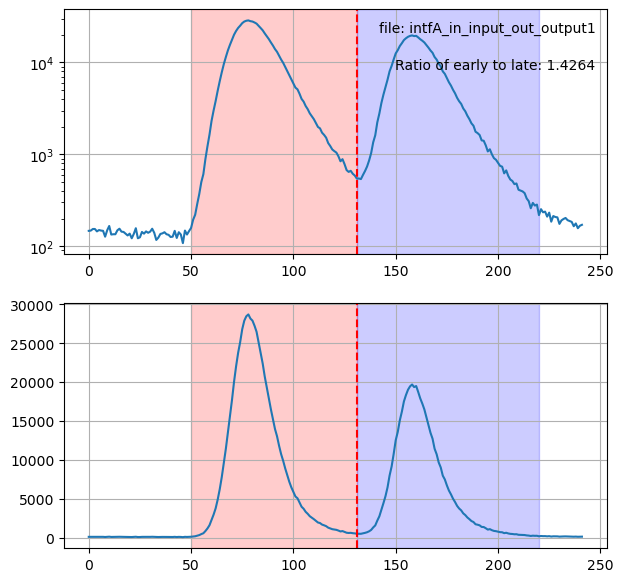

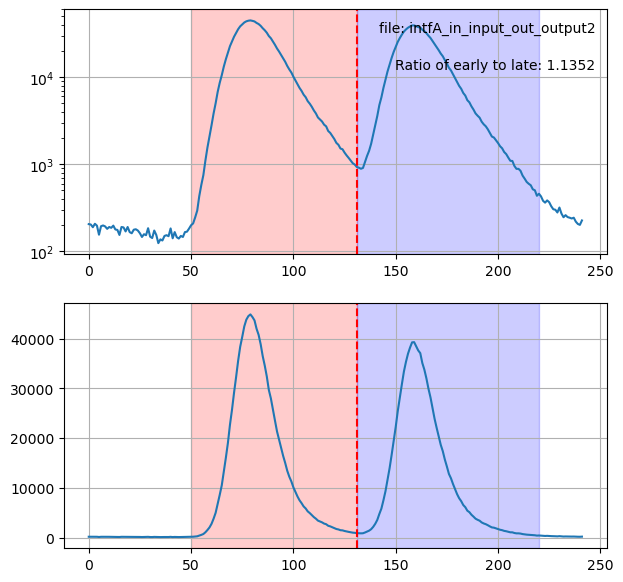

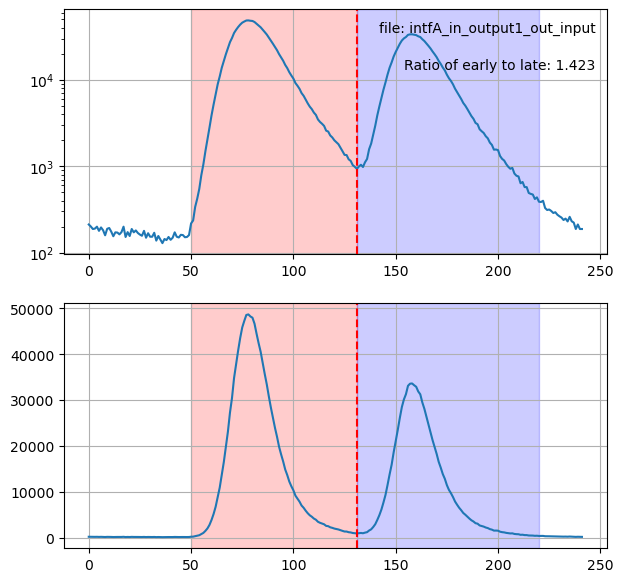

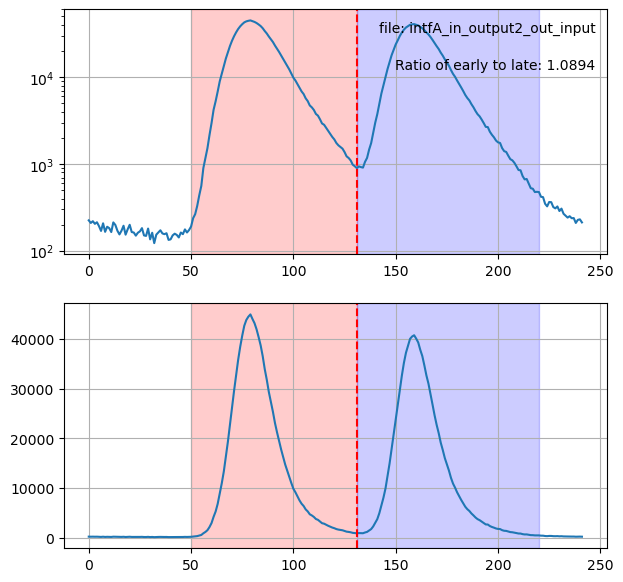

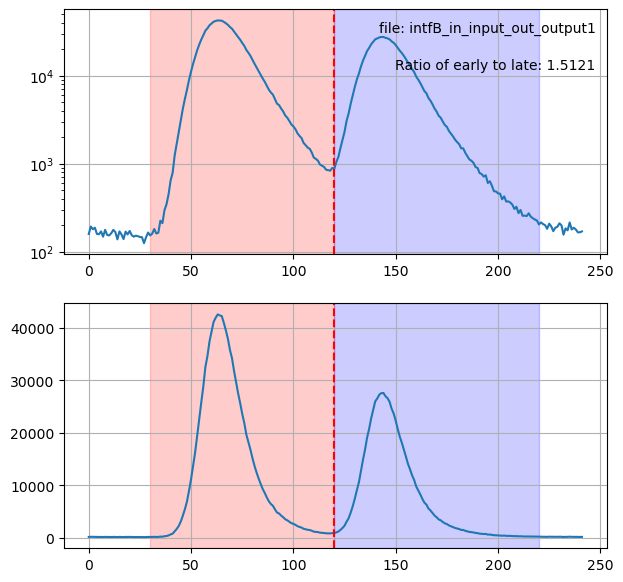

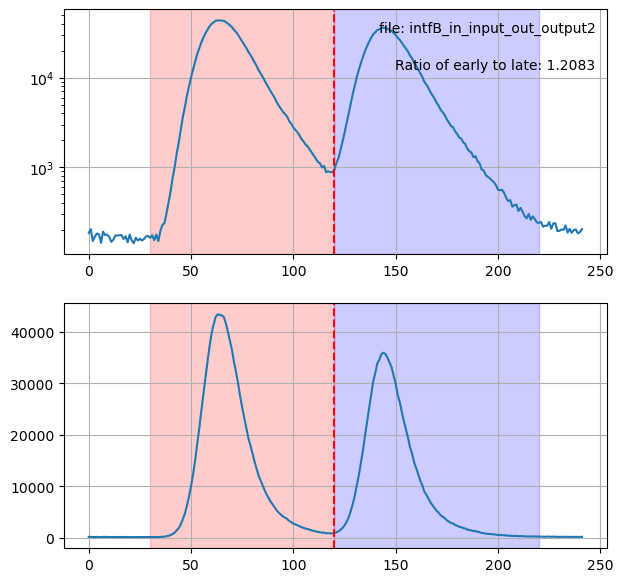

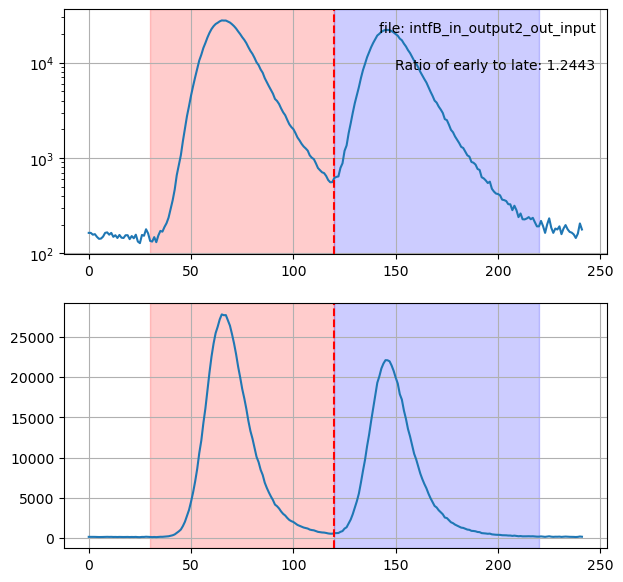

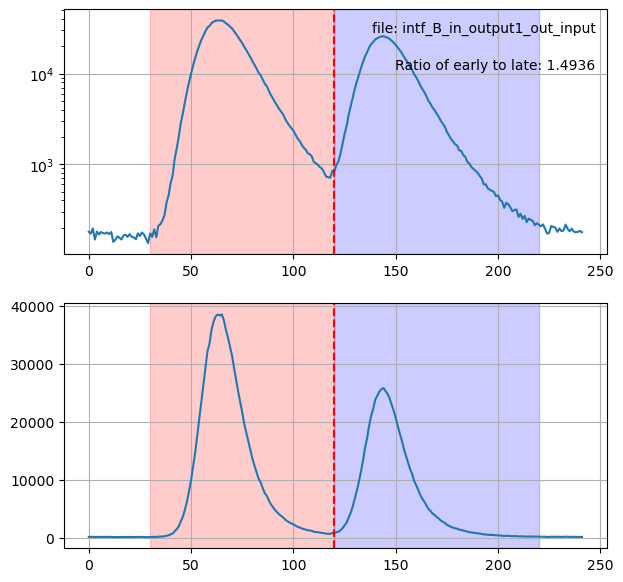

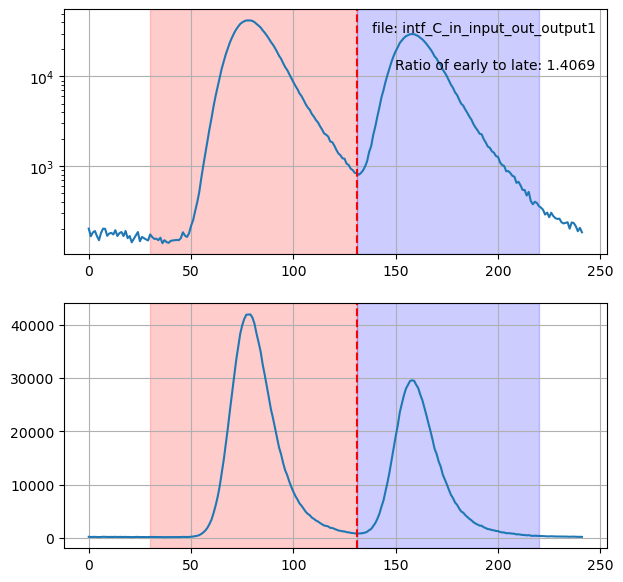

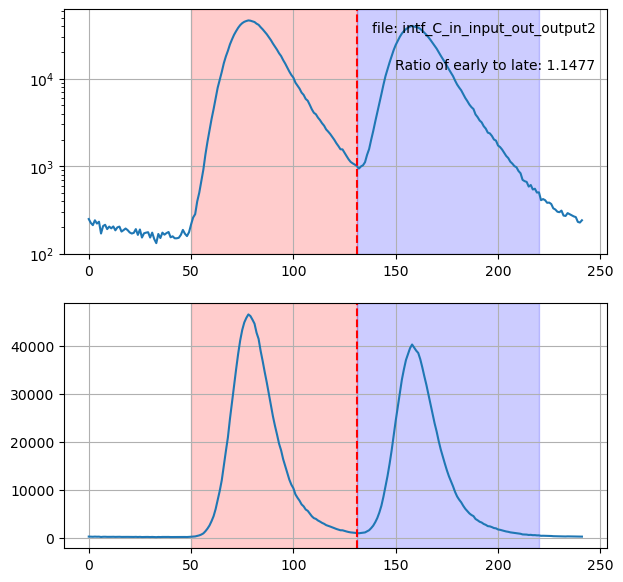

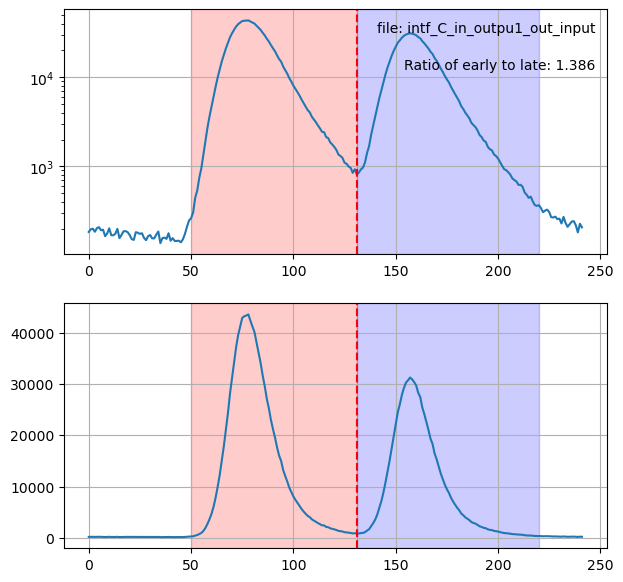

In [26]:
starts = [50,50,50,50,30,30,30,30,30,50,50,50]
middles = [131,131,131,131,120,120,120,120,131,131,131]
ends = [220,220,220,220,220,220,220,220,220,220,220,220]


for file, start, middle, end in zip(file_list, starts, middles, ends):
    intf_ratio(f"../data/{file}", start, end, middle, save_images=True)

Ratio of early to late peak counts:  1.1477


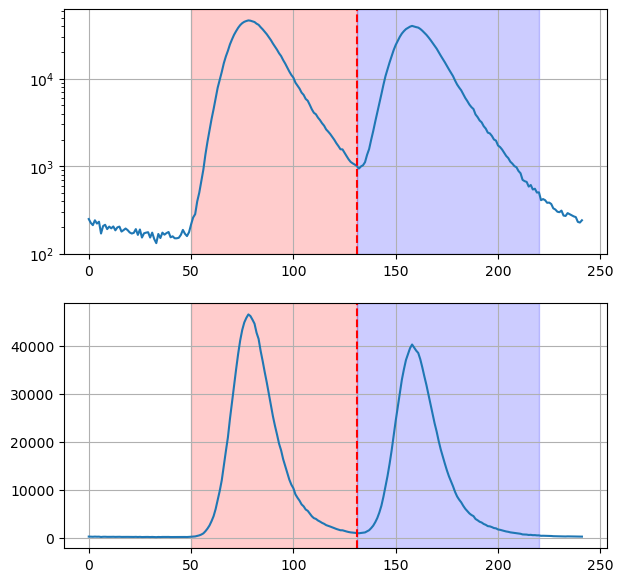

In [64]:
## Alice [Interferometer C]
intf_ratio("../data/intf_C_in_input_out_output2.json", 50, 220, 131)

Ratio of early to late peak counts:  1.2488


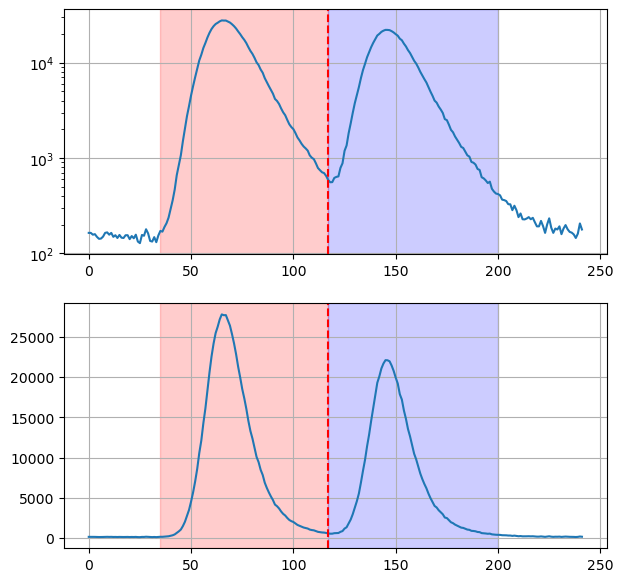

In [81]:
## Bob [Interferometer B]
intf_ratio("../data/intfB_in_output2_out_input.json", 35, 200, 117)

Ratio of early to late peak counts:  1.0876


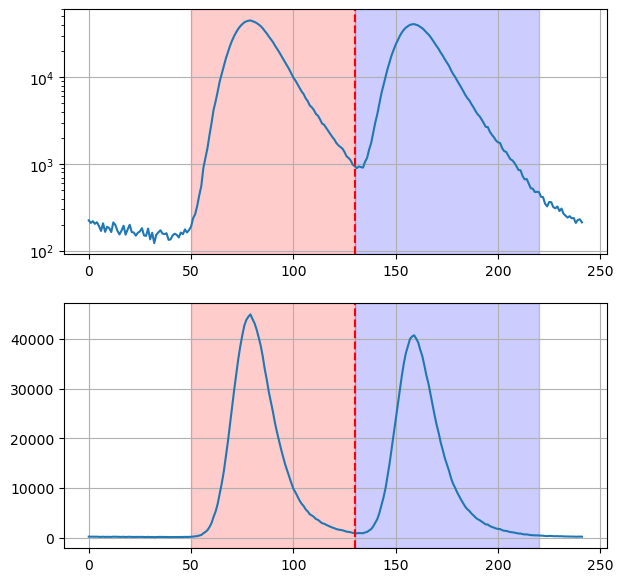

In [78]:
## Source [Interferometer A]
intf_ratio("../data/intfA_in_output2_out_input.json", 50, 220, 130)